# Self Organizing Map (SOM) to catch fraud customers who filed credit card applications

## Install and import relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.7-py3-none-any.whl size=8606 sha256=d6365d5b47e670946669dde81454e827cb19488395c18f3165d42a3eee441992
  Stored in directory: /root/.cache/pip/wheels/b9/32/90/b7e7953eeb50b9880bd01bcdbf832bf9550a54d834996f858c
Successfully built MiniSom
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


## Import Dataset

In [3]:
## UCI Machine Learning Repository -- Australia Credit Card Application Data

dataset = pd.read_csv('../input/credit-card-applications/Credit_Card_Applications.csv')
# separating the variable that tells us whether the application has been approved or rejected
# this is useful for visualizing or analyzing SOM results later depending on whether application of particular customer has been approved or not
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values #class = 1 approved ; class = 0 rejected 

## Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

## Training SOM

In [6]:
from minisom import MiniSom
# x,y => map size; input length = number of atrributes/variabels (in this case including customerID as well to be able to identify who's the frauder) so 15
# sigma = radius of different neighborhoods in the grid (default 1.0); higher learning rate ==> faster convergence (default 0.5)
# decay_function param not used in this example

som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X) #randomly initialize the values of the weight vectors to small numbers close to 0 (but not 0)
som.train_random(data = X, num_iteration = 100)

## Visualizing Results

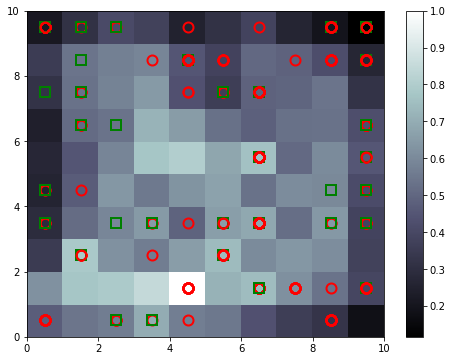

In [10]:
from pylab import bone, pcolor, colorbar, plot, show
plt.figure(figsize=(8,6))
bone() #initializing the canvas on which the visualization will be located
pcolor(som.distance_map().T) #mean inter-neuron distances in matrix ==> transpose
colorbar() #add legend
markers = ['o', 's'] #circle(rejected) and square(approved) markers
colors = ['r', 'g'] #red(rejected) and green(approved)
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, #adding 0.5 to x and y to center the marker (otherwise the default coordinate of w will be lower left corner of grid)
         w[1] + 0.5,
         markers[y[i]], #y is the class variable from dataset (whether application got approved or rejected)
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

Each grid represents winning nodes and the color represents the inter-neuron distances of each winning node. The grids that have ligher color (as you can see from the colorbar) are likely ones who have committed fraud in credit card applications. We see some fraud customers' applications in those grids (e.g. grid(1,2) and grid(6,5) got approved and some others got rejected. We would be interested in finding these cheaters who got away with fraud detection and managed to get their applications approved.

## Finding Frauds

In [19]:
# som.win_map(X) ==> returns a defaultdictionary whose keys are the coordinates of each grid's lower left corner (winning node)
# values are the vector arrays of each customer associated with each winning node(grid)
mappings = som.win_map(X)

#grid(6,5) and grid(1,2) that had relatively light colors and had some approved applications
frauds = np.concatenate((mappings[(6,5)], mappings[(1,2)]), axis = 0) 
frauds = sc.inverse_transform(frauds) #inverse_transform cuz it has been scaled

## Printing Fraunch Clients

In [20]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15662854
15610042
15568162
15745375
15638983
15654625
15662152
15623210
15734578
15570508
15795527
15641733
15660144
15603565
15802869
15664720
15627328
15645820
15800554
15617991
15696120
15750545
15567919
15687634
15638751
15641007
15665014
15606554
15687688
15638610
15789611
15668679
15738487
15649160
15773421
15682686
15781875
15809837
15621244
15636521
15632789
15761554
15707602
15811690
15815095
15720725
15567834
15591035
15672912
15694677
15598614
15772941
15608804
15631267
15611189
15759387
15712483
15572361
15698522
